In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

Chúng ta sẽ xây dựng mô hình hồi quy tuyến tính là một phương trình đường thẳng **y = ax + b**, điều cần xác định là hệ số góc **a** và giao điểm **c**. Chúng ta có thể gọi là **weight** và **bias**.

### Dataset

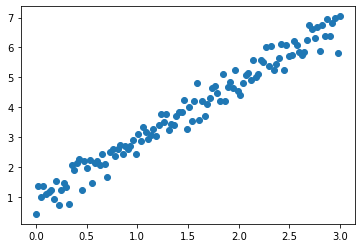

In [4]:
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3
plt.scatter(x, y, label="Input Dataset")
plt.show()

### Model 
Định nghĩa model bằng TF

In [5]:
class Model:
    def __init__(self):
        self.w = tf.Variable(np.random.randn(), name = "W") 
        self.b = tf.Variable(np.random.randn(), name = "b") 

    def __call__(self, x):
        return self.w * x + self.b

Mô hình sẽ khởi tạo các giá trị ngẫu nhiên, chúng ta sẽ xem thử kết quả dự đoán của mô hình khi chưa được huấn luyện

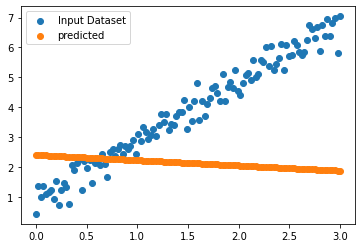

In [6]:
model = Model()
plt.scatter(x, y, label="Input Dataset")
plt.scatter(x, model(x), label="predicted")
plt.legend()
plt.show()

### Loss Function
$$loss(w)=\frac{1}{2}\sum_{i=1}^N(y_i - \hat{y}_i)^2=\frac{1}{2}\sum_{i=1}^N(y_i - \bar{x}_iw)^2$$

In [8]:
def loss(y, y_pred):
    return 1/2*tf.reduce_mean(tf.square(y - y_pred))

In [9]:
# Sử dụng tf.GradientTape để tính toán GD
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

### Training 
Chúng ta sẽ huấn luyện trong 100 epochs và lr=0.01

In [10]:
l_Model = Model()
Ws, bs = [], []
epochs = 100
for epoch in range(epochs):
    Ws.append(l_Model.w.numpy()) # eager
    bs.append(model.b.numpy())

    current_loss = loss(y, l_Model(x))

    train(l_Model, x, y, lr=0.12)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch count {epoch}: Loss Value: {current_loss.numpy()}")

Epoch count 9: Loss Value: 0.06551875919103622
Epoch count 19: Loss Value: 0.059840504080057144
Epoch count 29: Loss Value: 0.056383322924375534
Epoch count 39: Loss Value: 0.05425669252872467
Epoch count 49: Loss Value: 0.05294852703809738
Epoch count 59: Loss Value: 0.052143827080726624
Epoch count 69: Loss Value: 0.051648836582899094
Epoch count 79: Loss Value: 0.05134433135390282
Epoch count 89: Loss Value: 0.051157016307115555
Epoch count 99: Loss Value: 0.05104180797934532


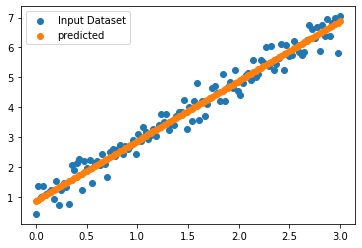

In [11]:
plt.scatter(x, y, label="Input Dataset")
plt.scatter(x, l_Model(x), label="predicted")
plt.legend()
plt.show()

In [12]:
l_Model.w.numpy(), l_Model.b.numpy()

(2.0063357, 0.8658242)